# [Clever Title]

## [Cool Subtitle]

### Project Members: Diana Chou, Max Scribner, Lewis Qualkenbush

### Table of Contents:

<ol>
    <li>Introduction</li>
    <li>Data Munging</li>
    <li>Data Exploration and Analysis</li>
    <li>Conclusion</li>
</ol>

#### Find Unique Characters for Analysis

In [1]:
import numpy as np
import pandas as pd

In [2]:
from functools import reduce

In [3]:
transcriptions = pd.read_csv("transcriptions/british.csv")
transcriptions = transcriptions.replace(to_replace='\'|:', value = '', regex = True)
transcriptions.transcription = transcriptions.transcription.str.lower()

def get_chars(string):
    chars = set()
    
    for char in string:
        chars.add(char.lower())
        
    return chars

orth_chars = set()
phon_chars = set()

for index, row in transcriptions.iterrows():
    orth_chars = orth_chars.union(get_chars(row["word"]))
    
    phon_chars = phon_chars.union(get_chars(row["transcription"]))

In [4]:
print(orth_chars)
print(phon_chars)

{'d', 'l', 'b', 'n', 'q', 'p', 'i', 'u', 's', 'g', 'e', 'v', 'f', 'w', 'm', 't', 'k', 'y', 'c', 'x', 'z', 'h', 'j', 'r', 'o', 'a'}
{'n', 'ɔ', 'æ', 'i', 'u', 'g', 'e', 'v', 'ɜ', 'f', 'w', 'm', 'ɒ', 't', 'k', 'ɑ', 'ʊ', 'z', 'h', 'ɪ', 'a', 'd', 'b', 'ŋ', 'p', 'ʒ', 'ð', 's', 'ˌ', 'ə', 'ʃ', 'ʌ', 'j', 'r', 'l', 'θ'}


#### Co-Occurence Map

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [6]:
orth_list = list(orth_chars)
phon_list = list(phon_chars)
orth_list.sort()
phon_list.sort()

print(orth_list)
print(phon_list)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
['a', 'b', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'p', 'r', 's', 't', 'u', 'v', 'w', 'z', 'æ', 'ð', 'ŋ', 'ɑ', 'ɒ', 'ɔ', 'ə', 'ɜ', 'ɪ', 'ʃ', 'ʊ', 'ʌ', 'ʒ', 'ˌ', 'θ']


In [7]:
heatmap_frame = pd.DataFrame(index=[i for i in range(0, len(phon_list))], columns=[i for i in range(0, len(orth_list))], data=0)

In [8]:
sample_transcriptions = transcriptions.sample(n=200)

In [9]:
for index, row in sample_transcriptions.iterrows():
    word_length = len(row['word'])
    transcription_length = len(row['transcription'])
    weight = word_length * transcription_length
    val = float(1/weight)
    
    for orth in list(row['word']):
        for phon in list(row['transcription']):
            if orth in orth_list and phon in phon_list:
                heatmap_frame.loc[[phon_list.index(phon)],[orth_list.index(orth)]] = heatmap_frame.loc[[phon_list.index(phon)],[orth_list.index(orth)]] + val

In [10]:
heatmap_frame.index = phon_list
heatmap_frame.columns = orth_list
heatmap_frame.head()

,a,b,c,d,e,f,g,h,i,j,...,q,r,s,t,u,v,w,x,y,z
a,0.045635,0.184444,0.083403,0.133333,0.768899,0.237500,0.194444,0.594444,0.934395,0.000000,...,0.033333,0.308284,0.226339,0.402579,0.419048,0.000000,0.336111,0.015625,0.173611,0.0625
b,0.195635,1.354167,0.073810,0.129167,0.559722,0.041667,0.033333,0.173611,0.162302,0.090476,...,0.000000,0.308333,0.067857,0.315278,0.295635,0.027778,0.000000,0.000000,0.173611,0.0000
d,0.554376,0.219643,0.228323,1.415835,0.730506,0.067857,0.073413,0.169366,0.283057,0.090476,...,0.000000,0.527728,0.160833,0.103810,0.131944,0.000000,0.118056,0.000000,0.140765,0.0000
e,1.041729,0.027778,0.288981,0.267154,1.710906,0.028968,0.122024,0.406519,0.245359,0.000000,...,0.000000,0.589973,0.401736,0.695867,0.050000,0.090278,0.161111,0.111260,0.425488,0.0000
f,0.484722,0.041667,0.022222,0.067857,0.638690,1.520635,0.263294,0.161111,0.416468,0.000000,...,0.000000,0.492063,0.061111,0.088095,0.287302,0.028571,0.062500,0.083333,0.017857,0.0000


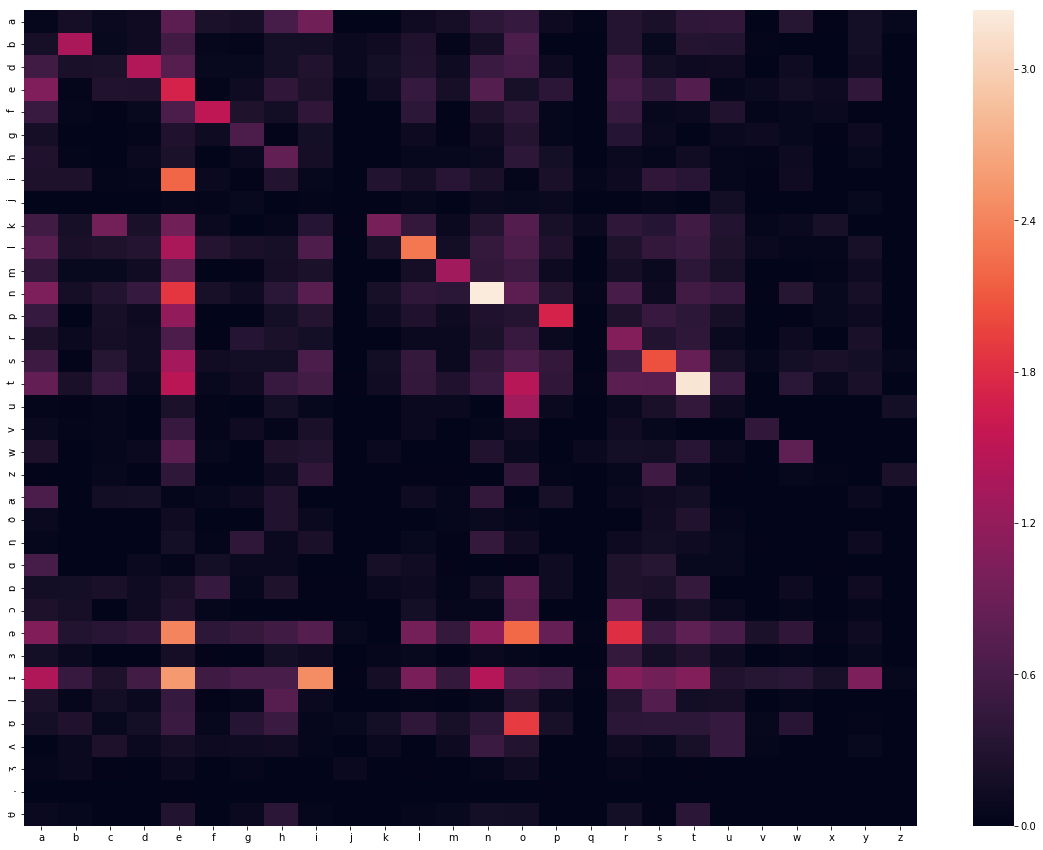

In [11]:
plt.subplots(figsize=(20,15))
ax = sns.heatmap(heatmap_frame)
plt.show()